<a href="https://colab.research.google.com/github/mdsiam135/ICCIT2025/blob/main/Sorted_Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd

# Load the CSV file (adjust encoding if needed)
df = pd.read_csv("/content/drive/MyDrive/UpdatedDataset/Dataset_integration(2014-2024).csv", encoding='latin1')

# Display correlation of 'Production (M.Ton)' with all other numerical columns
correlation_with_production = df.corr(numeric_only=True)['Production (M.Ton)'].sort_values(ascending=False)

# Print the correlation values
print(correlation_with_production)


Production (M.Ton)                                  1.000000
Area (Acres)                                        0.966715
Temperature at 2 Meters Range (C)                   0.099738
Year                                                0.039229
soil_temperature_0_to_7cm(C)                        0.024295
Root Zone Soil Wetness (surface to 100 cm below)   -0.051389
soil_moisture_0_to_7cm(m³/m³)                      -0.051886
Surface Soil Wetness (surface to 5 cm below)       -0.053710
soil_moiture_7_to_28cm(m³/m³)                      -0.054452
total_rain_mm                                      -0.057698
relative_humidity_2m(%)                            -0.086091
Precipitation Corrected (mm)                       -0.089087
Name: Production (M.Ton), dtype: float64


In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


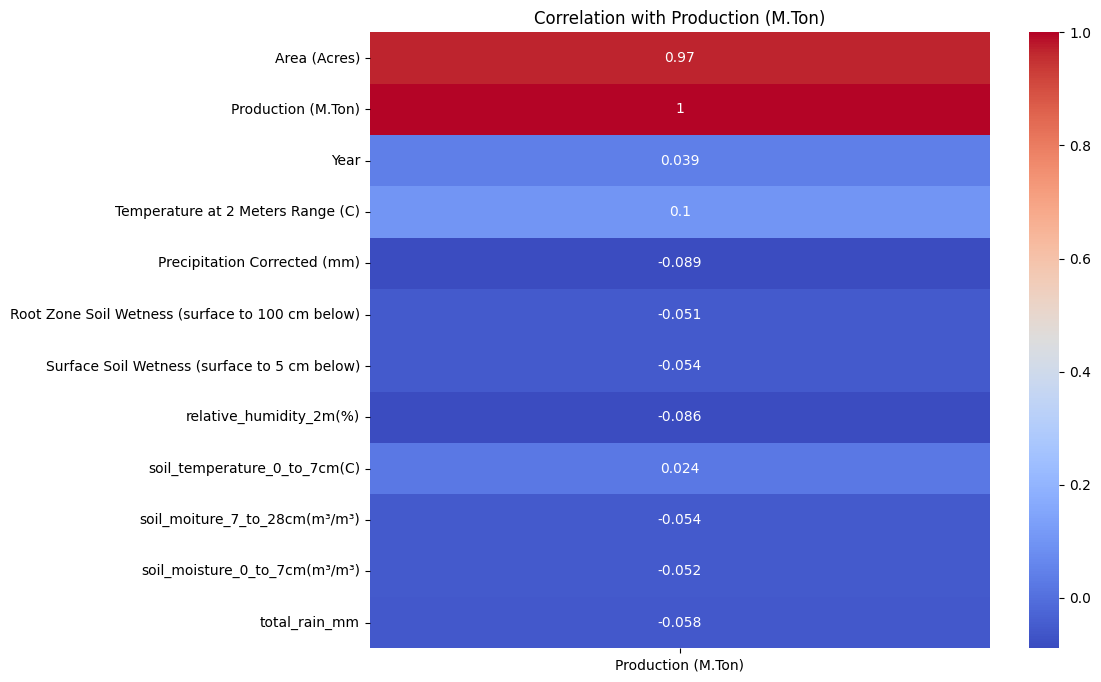

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of correlations with 'Production (M.Ton)'
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True)[['Production (M.Ton)']], annot=True, cmap='coolwarm')
plt.title('Correlation with Production (M.Ton)')
plt.show()


In [21]:
import pandas as pd

# Step 1: Load the CSV
df = pd.read_csv("/content/drive/MyDrive/UpdatedDataset/Dataset_integration(2014-2024).csv", encoding='latin1')

# Step 2: Identify non-numeric columns to keep at the front
non_numeric_cols = df.select_dtypes(exclude='number').columns.tolist()

# Step 3: Calculate correlation of numeric columns with Production (M.Ton)
correlation = df.corr(numeric_only=True)['Production (M.Ton)'].sort_values(ascending=False)

# Step 4: Get sorted list of numeric columns (excluding the target itself if desired)
numeric_sorted = correlation.index.tolist()

# Optional: Move 'Production (M.Ton)' to the front if it's not already
if 'Production (M.Ton)' in numeric_sorted:
    numeric_sorted.remove('Production (M.Ton)')
    numeric_sorted = ['Production (M.Ton)'] + numeric_sorted

# Step 5: Combine non-numeric columns and sorted numeric columns
final_column_order = non_numeric_cols + [col for col in numeric_sorted if col not in non_numeric_cols]

# Step 6: Reorder the DataFrame
df_sorted = df[final_column_order]

# Step 7: Save the result
df_sorted.to_csv("dataset1.csv", index=False)
